In [8]:
import tensorflow as tf

tf.__version__

'2.20.0'

## 케라스 (Keras)
- 딥러닝 모델을 쉽고 빠르게 만들 수 있도록 도와주는 고수준 딥러닝 라이브러리
- TensorFlow 위에서 동작하며, 복잡한 수학적 계산을 직접 구현하지 않고 모델 구성 및 학습 가능
- 특징
  - 초보자 친화적임 (간단한 코드로 신경망 모델 구현 가능)
  - 모듈화 (Layer, Loss, Optimizer 등)
  - TensorFlow 기반 => GPU 사용, 자동 미분 등 강력한 기능 지원

- 작성 흐름
  1. 모델 정의 (Sequential 또는 Functional API)
  2. 컴파일 (loss, optimizer, metrics 설정)
  3. 학습 (fit)
  4. 평가 (evaluate)
  5. 예측 (predict)

- 환경 세팅 (Keras 는 TensorFlow 내에 기본적으로 포함되어 있음)
  > pip install tensorflow


In [9]:
# ---- XOR 문제 ----

# * 데이터 준비
import numpy as np

# 입력 데이터 (x1, x2)
x=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

# 출력 데이터 (XOR 연산 결과)
y=np.array([0,1,1,0])

In [10]:
# 모델 정의 (생성) - Sequential
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(2,)),   # 은닉층
    layers.Dense(1, activation='sigmoid')                   # 출력층
])

# * layers.Dense : 뉴런(유닛) N개로 구성된 완전 연결층
#   - 모든 입력이 모든 뉴런과 연결되는 기본적인 신경망 구조
#   - Dense(4)    : 뉴런 4개를 가지는 레이어 생성
#   - activation : 뉴런의 출력을 비선형적으로 변환하는 함수 (활성화 함수)
#     'relu' (Rectified Linear Unit)
#     : 0보다 작은 0으로 처리, 그 외에는 원래 값으로 처리 (양수만 통과)
#     : 딥러닝 은닉층에서 가장 많이 사용되는 기본 활성화 함수

#     'sigmoid'
#     : 출력값을 0~1 사이로 압축
#     : 이진 분류 문제의 출력층에서 사용

# ------------------------------

# * 은닉층 (Hidden Layer)
#   : 입력에서 단순한 정보를 더 의미있는 특징(FEATURE)으로 변환하는 중간 처리 단계

# * 출력층(Output Layer)
#   : 모델이 내리는 최종 예측값을 생성하는 단계
#   : 문제 종류에 따라 활성화 함수와 뉴런 수가 달라짐
#     ex) 이진 분류 -> 뉴런 1개 + sigmoid



In [11]:
# * 모델 컴파일
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# * optimizer : 가중치를 어떻게 업데이트할지를 결정하는 알고리즘
#      'adam' : 기본 알고리즘
# * loss : 틀린 정도(손실)를 계산하는 공식 (손실 함수)
#       'binary_crossentropy': 이진 분류의 표준적인 손실 함수

# * metrics : 어떤 학습 결과를 볼 것인지 설정

In [12]:
# -- 모델 구조 확인 --
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# * 학습 => 가중치를 계속 업데이트하면서 최적화함
history = model.fit(
    x,y,
    epochs=500,     # 작은 데이터일 경우 크게 설정
    verbose=1       # 출력 설정
)
# * epochs : 한번에 모두 학습 횟수 (반복)
# * verbose : 출력 형태 설정
#   0: 출력 x
#   1: 기본 출력. 막대 그래프 표시.
#   2: epoch마다 한줄만 출력

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5000 - loss: 0.7851
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2500 - loss: 0.7839
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2500 - loss: 0.7828
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7816
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2500 - loss: 0.7805
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 0.7793
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 0.7782
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 0.7771
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 0.7759
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2500 - loss: 0.7748
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2500 - loss: 0.7737
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - l

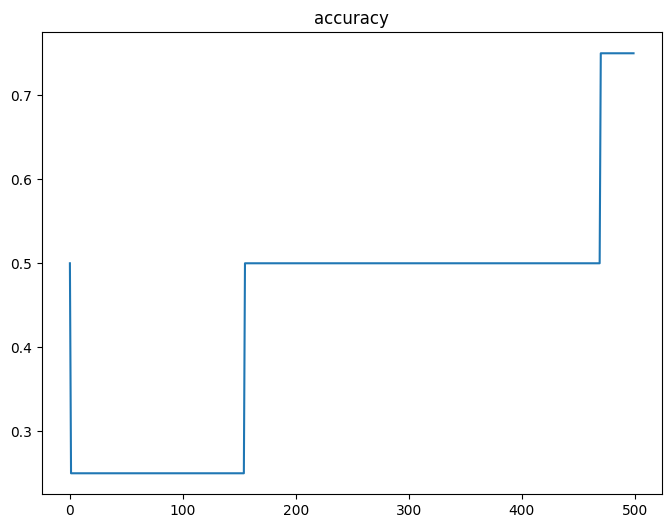

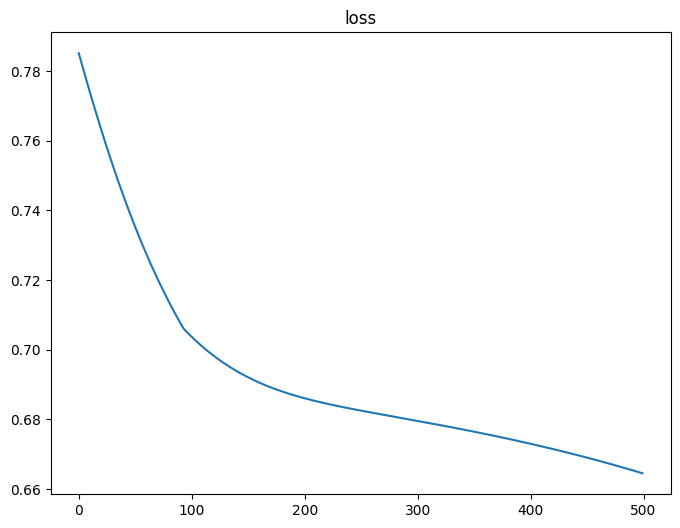

In [14]:
# * Loss 감소 확인 => 시각화
import matplotlib.pyplot as plt

# history.history.keys()

# plt.plot(history.history['loss'])

for key in list(history.history.keys()):
  plt.figure(figsize=(8,6))
  plt.plot(history.history[key])
  plt.title(key)

# * loss => 곡선이 점점 내려가다 안정화되면 좋음        (epoch 증가 -> loss 감소)
# * accuracy => 곡선이 점점 올라가다가 안정화되면 좋음  (epoch 증가 -> accuracy 증가)